In [1]:
import pandas as pd
import numpy as np

from astropy.coordinates import SkyCoord
import astropy.units as u

import matplotlib.pyplot as plt
import matplotlib.patches as patches

def to_galactic(ra, dec):
    coords = SkyCoord(ra*u.deg, dec*u.deg)
    return coords.galactic.l.value, coords.galactic.b.value

## LMXB data from Fortin et al., 2024
https://ui.adsabs.harvard.edu/abs/2024A%26A...684A.124F/abstract

In [2]:
xrbs = pd.read_csv('data/fortin.csv')

In [3]:
xrbs.head()

,Main_ID,RAdeg,DEdeg,PosErr,Pos_ref,Popular_ID,Status,Spectype,Spectype_ref,Spectype_flag,...,2MASS_ID,2MASS_RA,2MASS_Dec,2MASS_err,2MASS_ref,Gaia_ID,Gaia_RA,Gaia_Dec,Gaia_err,Gaia_ref
0,CXOGlb J002353.9-720350,5.974900,-72.063900,0.000004,NaN,NGC 104 125,confirmed,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,CXOGlb J002400.9-720453,6.004129,-72.081445,0.000002,NaN,47 Tuc X-5,candidate,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,CXOGlb J002403.4-720451,6.014684,-72.081116,0.000197,NaN,47 Tuc X-7,candidate,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,47 Tuc X-9,6.017767,-72.082803,0.000028,NaN,47 Tuc X-9,confirmed,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,CXOGlb J002404.9-720451,6.020417,-72.080833,0.000167,NaN,NGC 104 37,confirmed,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


### Get data for gaia counterparts

In [4]:
# gaia_ids = list(df['Gaia_ID'].value_counts().index)[1:]

# from astroquery.gaia import Gaia

# with open('data/gaia_ids.txt', 'w') as f:
#     for g in gaia_ids:
#         f.write(f'{g},\n')

# r = Gaia.launch_job(f"select * from gaiadr3.gaia_source where source_id in {tuple(gaia_ids)}")

# r = r.get_results()

# r.to_pandas().to_csv('data/gaia_matches.csv', index=False)

In [5]:
gaia = pd.read_csv('data/gaia_matches.csv')

In [6]:
gaia.head()

,solution_id,DESIGNATION,SOURCE_ID,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot
0,1636148068921376768,Gaia DR3 172650748928103552,172650748928103552,800309730,2016.0,65.428011,9.587519,32.907483,2.995200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1636148068921376768,Gaia DR3 789430249033567744,789430249033567744,1703071936,2016.0,169.544851,0.136973,48.036724,0.179136,0.160450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1636148068921376768,Gaia DR3 1315375795016730880,1315375795016730880,645203964,2016.0,241.441165,0.137478,25.862539,0.220611,0.402908,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1636148068921376768,Gaia DR3 1328057940096806528,1328057940096806528,1245108754,2016.0,250.432139,0.058878,36.466382,0.080384,-0.093828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1636148068921376768,Gaia DR3 1338822021487330304,1338822021487330304,736627852,2016.0,254.457539,0.011060,35.342322,0.012822,0.115295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Plot bp-rp of gaia lmxb counterparts

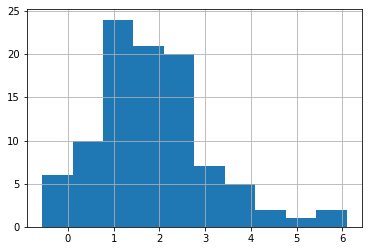

In [7]:
(gaia['phot_bp_mean_mag'] - gaia['phot_rp_mean_mag']).hist()

## Gaia CVs from Abril et al, 2020
https://ui.adsabs.harvard.edu/abs/2020MNRAS.492L..40A/abstract

In [8]:
from astroquery.vizier import Vizier

In [9]:
Vizier.ROW_LIMIT = -1
v = Vizier.get_catalogs("J/MNRAS/492/L40")

In [10]:
cvs = v.values()[0].to_pandas()

#### plot CV bp-rp

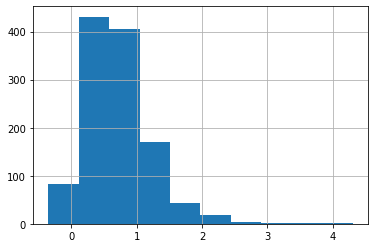

In [11]:
(cvs['BPmag'] - cvs['RPmag']).hist()

### Investigate galactic distribution of CVs abd LMXBs in latitude

In [12]:
xrbs['ldeg'], xrbs['bdeg'] = to_galactic(xrbs['RAdeg'].values, xrbs['DEdeg'].values)

In [13]:
sum(abs(xrbs['bdeg'] < 10)) / len(xrbs['bdeg'])

0.9262536873156342

In [14]:
cvs['ldeg'], cvs['bdeg'] = to_galactic(cvs['RAJ2000'].values, cvs['DEJ2000'].values)


In [15]:
sum(abs(cvs['bdeg'] < 10)) / len(cvs['bdeg'])

0.5818030050083473

## Plot cuts in galactic latitude and bp - rp

##### data munging...

In [16]:
cvs['bprp'] = cvs['BPmag'] - cvs['RPmag']

In [17]:
gaia_xrbs = xrbs.loc[xrbs['Gaia_ID']!=0]

In [18]:
gaia['Gaia_ID'] = gaia['DESIGNATION'].str.strip('Gaia DR3').astype(int)

In [19]:
gaia = gaia.set_index('Gaia_ID')

In [20]:
gaia_xrbs = gaia_xrbs.join(gaia, on='Gaia_ID')

In [21]:
gaia_xrbs['bprp'] = (gaia_xrbs['phot_bp_mean_mag'] - gaia_xrbs['phot_rp_mean_mag'])

### Make scatterplots

In [22]:
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# Set tick size
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4

plt.rcParams['axes.labelsize'] = 14

# Define Cut

In [23]:
b_cut = 20 # within this many degrees of galactic equator
bprp_cut = 1.5 # at least this red in bp-rp
bprp_max = 7 # for plotting only

In [24]:
sub_xrbs = gaia_xrbs.query(f'(abs(b) < {b_cut}) and (bprp > {bprp_cut})')
sub_cvs = cvs.query(f'(abs(bdeg) < {b_cut}) and (bprp > {bprp_cut})')

n_obj = len(gaia_xrbs) + len(cvs)
n_cvs = len(cvs)
n_lmxbs = len(gaia_xrbs)
n_cvs_cut = len(sub_cvs)
n_lxmbs_cut = len(sub_xrbs)
n_obj_cut = n_lxmbs_cut + n_cvs_cut


n_cvs_cut

## Full dataset
print('full datasets')
# LMXB Completeness 
print(f'number of lmxbs / total lmxbs: {n_lmxbs/n_lmxbs:0.3f}')

# LMXB purity
print(f'number of lmxbs / total lmxbs + cvs: {n_lmxbs/n_obj:0.3f}')

## After cut
print('\nafter cuts')
# LMXB Completeness 
print(f'number of lmxbs in sample / total lmxbs: {n_lxmbs_cut/n_lmxbs:0.3f}')

# LMXB purity
print(f'number of lmxbs in sample / total lmxbs + cvs: {n_lxmbs_cut/n_obj_cut:0.3f}')




full datasets
number of lmxbs / total lmxbs: 1.000
number of lmxbs / total lmxbs + cvs: 0.105

after cuts
number of lmxbs in sample / total lmxbs: 0.357
number of lmxbs in sample / total lmxbs + cvs: 0.500


### Just the scatterplot

Text(0.5, 1.0, 'Galactic CVs and LMXBs by Color and $b$')

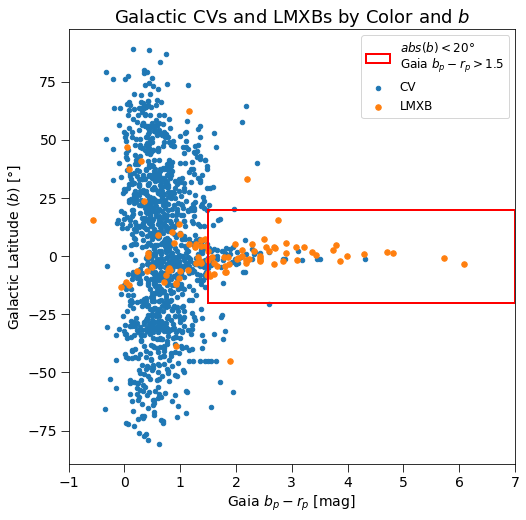

In [25]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
ax.scatter(cvs['bprp'], cvs['bdeg'], label='CV', s=20)
ax.scatter(gaia_xrbs['bprp'], gaia_xrbs['bdeg'], label='LMXB', s=30)
ax.set_ylabel(r'Galactic Latitude ($b$) [$\degree$]')
ax.set_xlabel(r'Gaia $b_p - r_p$ [mag]')
ax.set_xlim([-1, 7])

# label with cut dimensions
rect = patches.Rectangle((bprp_cut, -b_cut), bprp_max - bprp_cut, 2*b_cut, linewidth=2, edgecolor='r', facecolor='none', label=r'$abs(b) < {}\degree$'.format(b_cut)+'\n'+r'Gaia $b_p-r_p > {}$'.format(bprp_cut))

# label without cut dimensions
# rect = patches.Rectangle((bprp_cut, -b_cut), bprp_max - bprp_cut, 2*bprp_cut, linewidth=2, edgecolor='r', facecolor='none', label=r'proposed cut')

ax.add_patch(rect)

ax.legend(prop={'size': 12})
plt.title(r'Galactic CVs and LMXBs by Color and $b$', fontsize=18)


### Plot with marginal distributions

In [26]:
def scatter_hist(x, y, ax, ax_histx, ax_histy, label, dens=True, set_lims=True, set_lims2=False, s=1):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    
    xbins=10
    ybins=10

    # the scatter plot:
    ax.scatter(x, y, s=s, label=label)
    
    if set_lims:
        # plot 1 bin params
        ybins = np.linspace(-40, 60, 20)
        xbins = np.linspace(-1, 7, 15)
        
    if set_lims2:
        # plot 2 bin params
        ybins = np.linspace(-20, 20, 15)
        xbins = np.linspace(1.75, 7, 15)        
        
    ax_histx.hist(x, bins=xbins, histtype='step', density=dens, linewidth=2)
    ax_histy.hist(y, bins=ybins, orientation='horizontal', histtype='step', density=dens, linewidth=2)

#### Plot 1

Text(0.5, 0.98, 'Galactic CVs and LMXBs by Color and b')

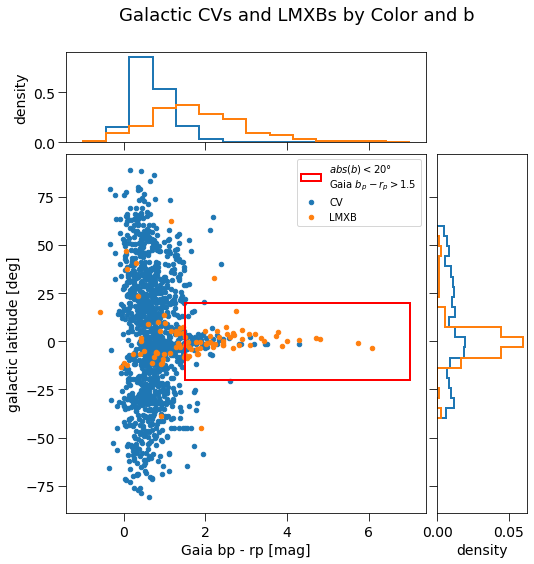

In [27]:
fig = plt.figure(figsize=(8, 8))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal Axes and the main Axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.set_ylabel('density')
ax_histy.set_xlabel('density')
# Draw the scatter plot and marginals.
scatter_hist(cvs['bprp'], cvs['bdeg'], ax, ax_histx, ax_histy, 'CV', s=20)
scatter_hist(gaia_xrbs['bprp'], gaia_xrbs['bdeg'], ax, ax_histx, ax_histy, 'LMXB', s=20)
ax.set_ylabel('galactic latitude [deg]')
ax.set_xlabel('Gaia bp - rp [mag]')

rect = patches.Rectangle((bprp_cut, -b_cut), bprp_max - bprp_cut, 2*b_cut, linewidth=2, edgecolor='r', facecolor='none', label=r'$abs(b) < {}\degree$'.format(b_cut)+'\n'+r'Gaia $b_p-r_p > {}$'.format(bprp_cut))
ax.add_patch(rect)

ax.legend(prop={'size': 10})

plt.suptitle('Galactic CVs and LMXBs by Color and b', fontsize=18)


## make cut 
- galactic longitude within $20deg$ of 0
- bp-rp greather than 1.5 (red)

#### subset dfs and plot again, getting completeness and purity

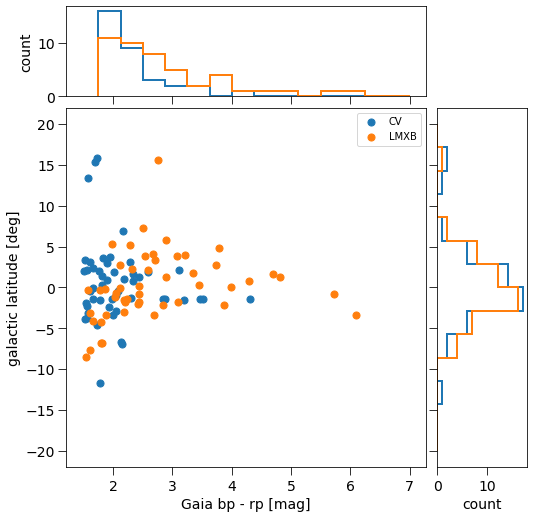

In [28]:
fig = plt.figure(figsize=(8, 8))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal Axes and the main Axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.set_ylabel('count')
ax_histy.set_xlabel('count')
# Draw the scatter plot and marginals.
scatter_hist(sub_cvs['bprp'], sub_cvs['bdeg'], ax, ax_histx, ax_histy, 'CV', set_lims=False,set_lims2=True, s=50, dens=False)
scatter_hist(sub_xrbs['bprp'], sub_xrbs['bdeg'], ax, ax_histx, ax_histy, 'LMXB', set_lims=False, set_lims2=True, s=50, dens=False)
ax.set_ylabel('galactic latitude [deg]')
ax.set_xlabel('Gaia bp - rp [mag]')
ax.legend()
